In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import re
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def to_num(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            return s

In [2]:
res = []
with open('test1.log', 'r') as lines:
    numRows = 0
    tmp = []
    for line in lines:
        if line.strip() != '---':
            if len((line.strip().split(':'))[1].strip()):
                tmp.append(to_num((line.strip().split(':'))[1].strip()))
        else:
            res.append(tmp)
            tmp = []
            
            
cols = ['seq', 'secs', 'nsecs', 'frame_id', 'utm_east', 'utm_north',
       'utm_up', 'roll', 'pitch', 'yaw', 'velo_north',
       'velo_east', 'velo_down', 'velo_robot_x',
       'velo_robot_y', 'velo_robot_z', 'acc_robot_x',
       'acc_robot_y', 'acc_robot_z', 'omega_yaw', 'omega_pitch',
       'omega_roll', 'nav_mode', 'pos_mode', 'vel_mode']

df = pd.DataFrame(res, columns=cols)
df = df.drop(columns = ['seq', 'frame_id'])

In [8]:
x = df.utm_east
y = df.utm_north
z = df.utm_up
roll = df.roll
pitch = df.pitch
yaw = df.yaw
acc = df.acc_robot_x

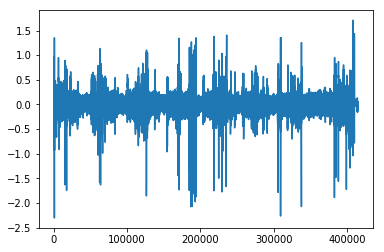

In [9]:
plt.plot(acc)

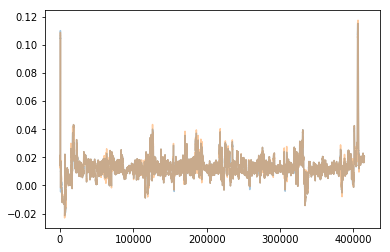

In [20]:
plt.plot(np.sin(pitch), alpha=0.4)
plt.plot(np.sin(pitch)-bias(acc), alpha = 0.4)

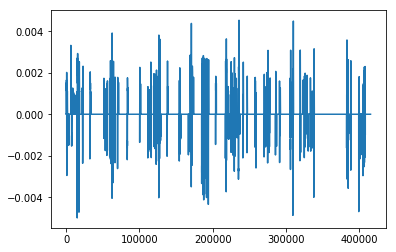

In [10]:
plt.plot(bias(acc))

In [7]:
# Moving Average
def MA(seq, w):
    """
    Moving average
    seq: sequence; w: window size
    """
    out0 = np.convolve(seq,np.ones(w,dtype=int),'valid')/w
    r = np.arange(1,w-1,2)
    start = np.cumsum(seq[:w-1])[::2]/r
    stop = (np.cumsum(seq[:-w:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

# thresholding function
def TH(x, th):
    """
    thresholding function
    th is the relative threshold, ratio to the largest abs value
    """
    
    x_n = x/np.abs(x).max()
    res = x_n.copy()
    res[np.abs(res)<th] = 0
    return res

def shrink(x, scale = 0.01):
    """
    """
    
#     res = np.sign(res)*np.sqrt(np.abs(x))
    res = np.sign(x)*np.abs(x)/(np.abs(x)+1)
    res *= scale
    
    return res

def bias(acc, ma_size = 101, th = 0.1, scale =0.01):
    """
    
    """
    
    acc_ = MA(acc, ma_size)
    acc_ = TH(acc_, th)
    acc_ = shrink(acc_, scale)
    return acc_

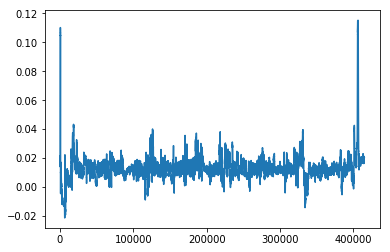

In [6]:
plt.plot(np.sin(pitch))

In [ ]:
plt.plot()

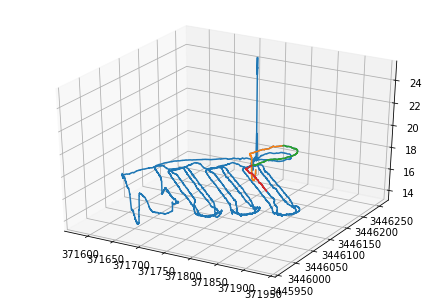

In [5]:
fig=plt.figure()
ax = Axes3D(fig)
# ax.set_aspect('equal')
ax.plot(x, y, z)
ax.plot(x[:10000], y[:10000], z[:10000])
ax.plot(x[10000:20000], y[10000:20000], z[10000:20000])
ax.plot(x[20000:30000], y[20000:30000], z[20000:30000])

In [6]:
# Moving Average
def MA(seq, w):
    """
    Moving average
    seq: sequence; w: window size
    """
    out0 = np.convolve(seq,np.ones(w,dtype=int),'valid')/w
    r = np.arange(1,w-1,2)
    start = np.cumsum(seq[:w-1])[::2]/r
    stop = (np.cumsum(seq[:-w:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

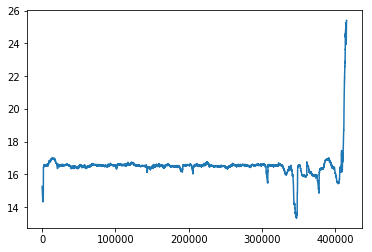

In [7]:
plt.plot(z)

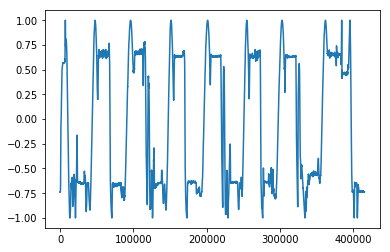

In [8]:
plt.plot(np.sin(yaw))

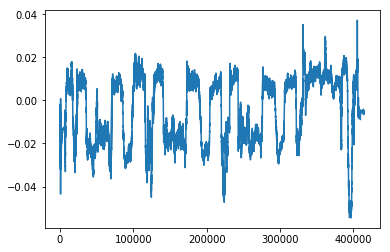

In [9]:
plt.plot(np.sin(roll))

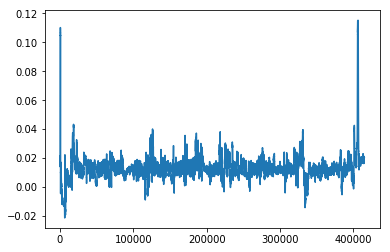

In [10]:
plt.plot(np.sin(pitch))

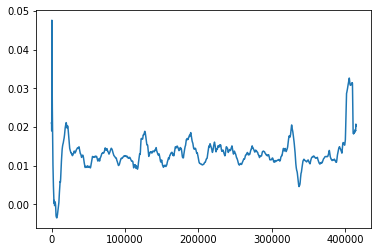

In [11]:
plt.plot(MA(np.sin(pitch), 10001))

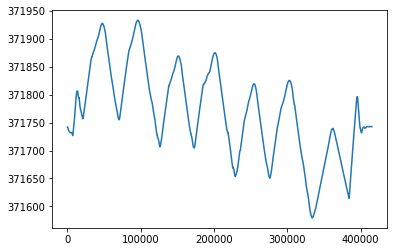

In [12]:
plt.plot(x)

In [1]:
plt.plot(np.sin(pitch))

NameError: name 'plt' is not defined